In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## <b style='color:blue'>INTRODUCING DATA<b>

In [2]:
# Projected travels into the future according to demographics and land use
P_is = np.array([750, 580, 480])    # produced
A_js = np.array([722, 786, 302])    # attracted

# Matrix of travels obtained with gravitational model, neutral calibration coeffs (simulating historical data)
gvalsr_m = np.array([[82, 140, 78], [43, 26, 31], [82, 31, 37]])

# Adjusted intial travels matrices
gvalsadjA = np.array([[81, 116, 103], [40, 20, 39], [78, 25, 47]])    # interative adjustment (Furness style)
gvalsadjB = np.array([[78, 112, 110], [40, 22, 38], [83, 26, 40]])    # weighted adjustment (new method)

# Calibration coefficients resulted accordingly
ccoeffsA = np.array([[0.49, 0.95, 1.46], [1.25, 1, 0.77], [1.41, 1.2, 0.21]])    # iterative ...
ccoeffsB = np.array([[0.51, 0.98, 1.36], [1.25, 0.91, 0.79], [1.33, 1.15, 0.25]])    # weighted ...

#### <b style='color:blue'>1% ACCURACY<b>

In [3]:
# Matrix of future travels obtained with gravitational model and ccoeffs matrix
gvalsr_fin1 = np.array([[116, 384, 247], [297, 237, 48], [310, 165, 8]])

# Matrix of travels obtained with Furness method
travsc_furn1 = np.array([[101, 450, 195], [297, 193, 92], [325, 144, 15]])

# Matrix of travels obtained with Fratar method
travsc_frat1 = np.array([[101, 454, 195], [300, 190, 91], [325, 140, 15]])

# Matrix of travels obtained with average growth factor
travsc_avgf1 = np.array([[104, 464, 186], [296, 175, 104], [325, 141, 15]])

# Matrix of travels obtained with Detroit method
travsc_detr1 = np.array([[103, 457, 198], [296, 191, 91], [320, 141, 15]])

# Matrix of travels obtained with weighted method (new method)
travsc_wgtd1 = np.array([[104, 488, 156], [296, 154, 130], [324, 143, 14]])   # averaged
travsc_wgtdP1 = np.array([[103, 487, 157], [295, 155, 131], [324, 144, 14]])  # starting from produced 
travsc_wgtdA1 = np.array([[106, 488, 156], [296, 154, 130], [324, 142, 13]])  # starting from attracted 

#### Flatten the original arrays

In [4]:
gvalsr_finflat1 = gvalsr_fin1.flatten()

travsc_furnflat1 = travsc_furn1.flatten()

travsc_fratflat1 = travsc_frat1.flatten()

travsc_avgfflat1 = travsc_avgf1.flatten()

travsc_detrflat1 = travsc_detr1.flatten()

travsc_wgtdflat1 = travsc_wgtd1.flatten()

travsc_wgtdflatP1 = travsc_wgtdP1.flatten()

travsc_wgtdflatA1 = travsc_wgtdA1.flatten()

#### Create a df from flattened arrays

In [5]:
all_travs1 = pd.DataFrame(data=[gvalsr_finflat1, travsc_fratflat1,
                               travsc_furnflat1, travsc_avgfflat1,
                               travsc_detrflat1, travsc_wgtdflat1]).T
all_travs1.columns = ['gravit-1%', 'fratar-1%', 'furness-1%', 'avGF-1%', 'detroit-1%', 'weighted-1%']
row_nms = {0:'1-1', 1:'1-2', 2:'1-3',
           3:'2-1', 4:'2-2', 5:'2-3',
           6:'3-1', 7:'3-2', 8:'3-3'}
all_travs1 = all_travs1.rename(index = row_nms)
all_travs1.head(9)

,gravit-1%,fratar-1%,furness-1%,avGF-1%,detroit-1%,weighted-1%
1-1,116,101,101,104,103,104
1-2,384,454,450,464,457,488
1-3,247,195,195,186,198,156
2-1,297,300,297,296,296,296
2-2,237,190,193,175,191,154
2-3,48,91,92,104,91,130
3-1,310,325,325,325,320,324
3-2,165,140,144,141,141,143
3-3,8,15,15,15,15,14


#### Create another df from gravity model and weighted method arrays

In [6]:
wg_travs1 = pd.DataFrame(data=[gvalsr_finflat1, travsc_wgtdflat1,
                               travsc_wgtdflatP1, travsc_wgtdflatA1]).T
wg_travs1.columns = ['gravit-1%', 'weightedAV-1%', 'weightedP-1%', 'weightedA-1%']
wg_travs1 = wg_travs1.rename(index = row_nms)
wg_travs1.head(9)

,gravit-1%,weightedAV-1%,weightedP-1%,weightedA-1%
1-1,116,104,103,106
1-2,384,488,487,488
1-3,247,156,157,156
2-1,297,296,295,296
2-2,237,154,155,154
2-3,48,130,131,130
3-1,310,324,324,324
3-2,165,143,144,142
3-3,8,14,14,13


In [96]:
# determine RMSE of GF methods/model in reference to gravity model to establish the importance of P and A
# perspectives
rmse_av = np.sqrt(np.mean((wg_travs1['weightedAV-1%'] - wg_travs1['gravit-1%']) ** 2))
for col in wg_travs1.iloc[:, 2:]:
    rmse = np.sqrt(np.mean((wg_travs1[col] - wg_travs1['gravit-1%']) ** 2))
    print('Delta RMSE for column, ',col, 'is ', f'{abs(rmse - rmse_av):.5f}')

Delta RMSE for column,  weightedP-1% is  0.36769
Delta RMSE for column,  weightedA-1% is  0.00910


#### Check correlation

In [8]:
# Pearson correlation table with colorscheme, all methods
all_travs1.corr().style.background_gradient(cmap='coolwarm')

,gravit-1%,fratar-1%,furness-1%,avGF-1%,detroit-1%,weighted-1%
gravit-1%,1.000000,0.956986,0.958982,0.938641,0.957294,0.891528
fratar-1%,0.956986,1.000000,0.999892,0.998022,0.999789,0.983302
furness-1%,0.958982,0.999892,1.000000,0.997581,0.999685,0.982330
avGF-1%,0.938641,0.998022,0.997581,1.000000,0.997898,0.992477
detroit-1%,0.957294,0.999789,0.999685,0.997898,1.000000,0.983058
weighted-1%,0.891528,0.983302,0.982330,0.992477,0.983058,1.000000


In [9]:
# Pearson correlation table with colorscheme, gravity and weighted models
wg_travs1.corr().style.background_gradient(cmap='coolwarm')

,gravit-1%,weightedAV-1%,weightedP-1%,weightedA-1%
gravit-1%,1.000000,0.891528,0.892185,0.891643
weightedAV-1%,0.891528,1.000000,0.999984,0.999982
weightedP-1%,0.892185,0.999984,1.000000,0.999948
weightedA-1%,0.891643,0.999982,0.999948,1.000000


#### Get the stats tableau and median for each column in dfs

In [10]:
# all_travs1.T

In [11]:
all_travs1.describe()

,gravit-1%,fratar-1%,furness-1%,avGF-1%,detroit-1%,weighted-1%
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,201.333333,201.222222,201.333333,201.111111,201.333333,201.000000
std,126.083306,136.820848,135.285809,137.606726,136.349734,142.977271
min,8.000000,15.000000,15.000000,15.000000,15.000000,14.000000
25%,116.000000,101.000000,101.000000,104.000000,103.000000,130.000000
50%,237.000000,190.000000,193.000000,175.000000,191.000000,154.000000
75%,297.000000,300.000000,297.000000,296.000000,296.000000,296.000000
max,384.000000,454.000000,450.000000,464.000000,457.000000,488.000000


In [12]:
for col in all_travs1.describe().iloc[:, :]:
    print('IQR for col ', col, 'is ', all_travs1.describe().loc['75%', col] - all_travs1.describe().loc['25%', col])

IQR for col  gravit-1% is  181.0
IQR for col  fratar-1% is  199.0
IQR for col  furness-1% is  196.0
IQR for col  avGF-1% is  192.0
IQR for col  detroit-1% is  193.0
IQR for col  weighted-1% is  166.0


In [13]:
wg_travs1.describe()

,gravit-1%,weightedAV-1%,weightedP-1%,weightedA-1%
count,9.000000,9.000000,9.000000,9.000000
mean,201.333333,201.000000,201.111111,201.000000
std,126.083306,142.977271,142.537227,143.024473
min,8.000000,14.000000,14.000000,13.000000
25%,116.000000,130.000000,131.000000,130.000000
50%,237.000000,154.000000,155.000000,154.000000
75%,297.000000,296.000000,295.000000,296.000000
max,384.000000,488.000000,487.000000,488.000000


<Axes: >

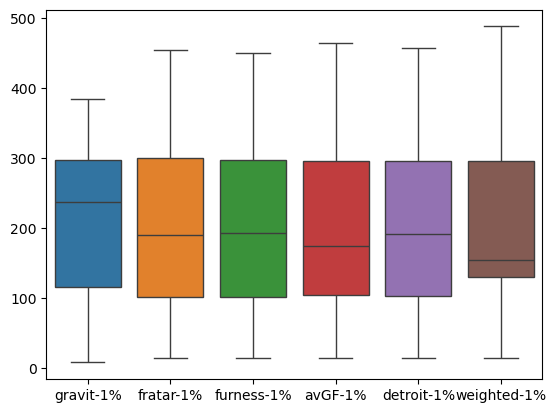

In [14]:
# all_travs1.apply(pd.DataFrame.describe, axis=1)
sns.boxplot(all_travs1)

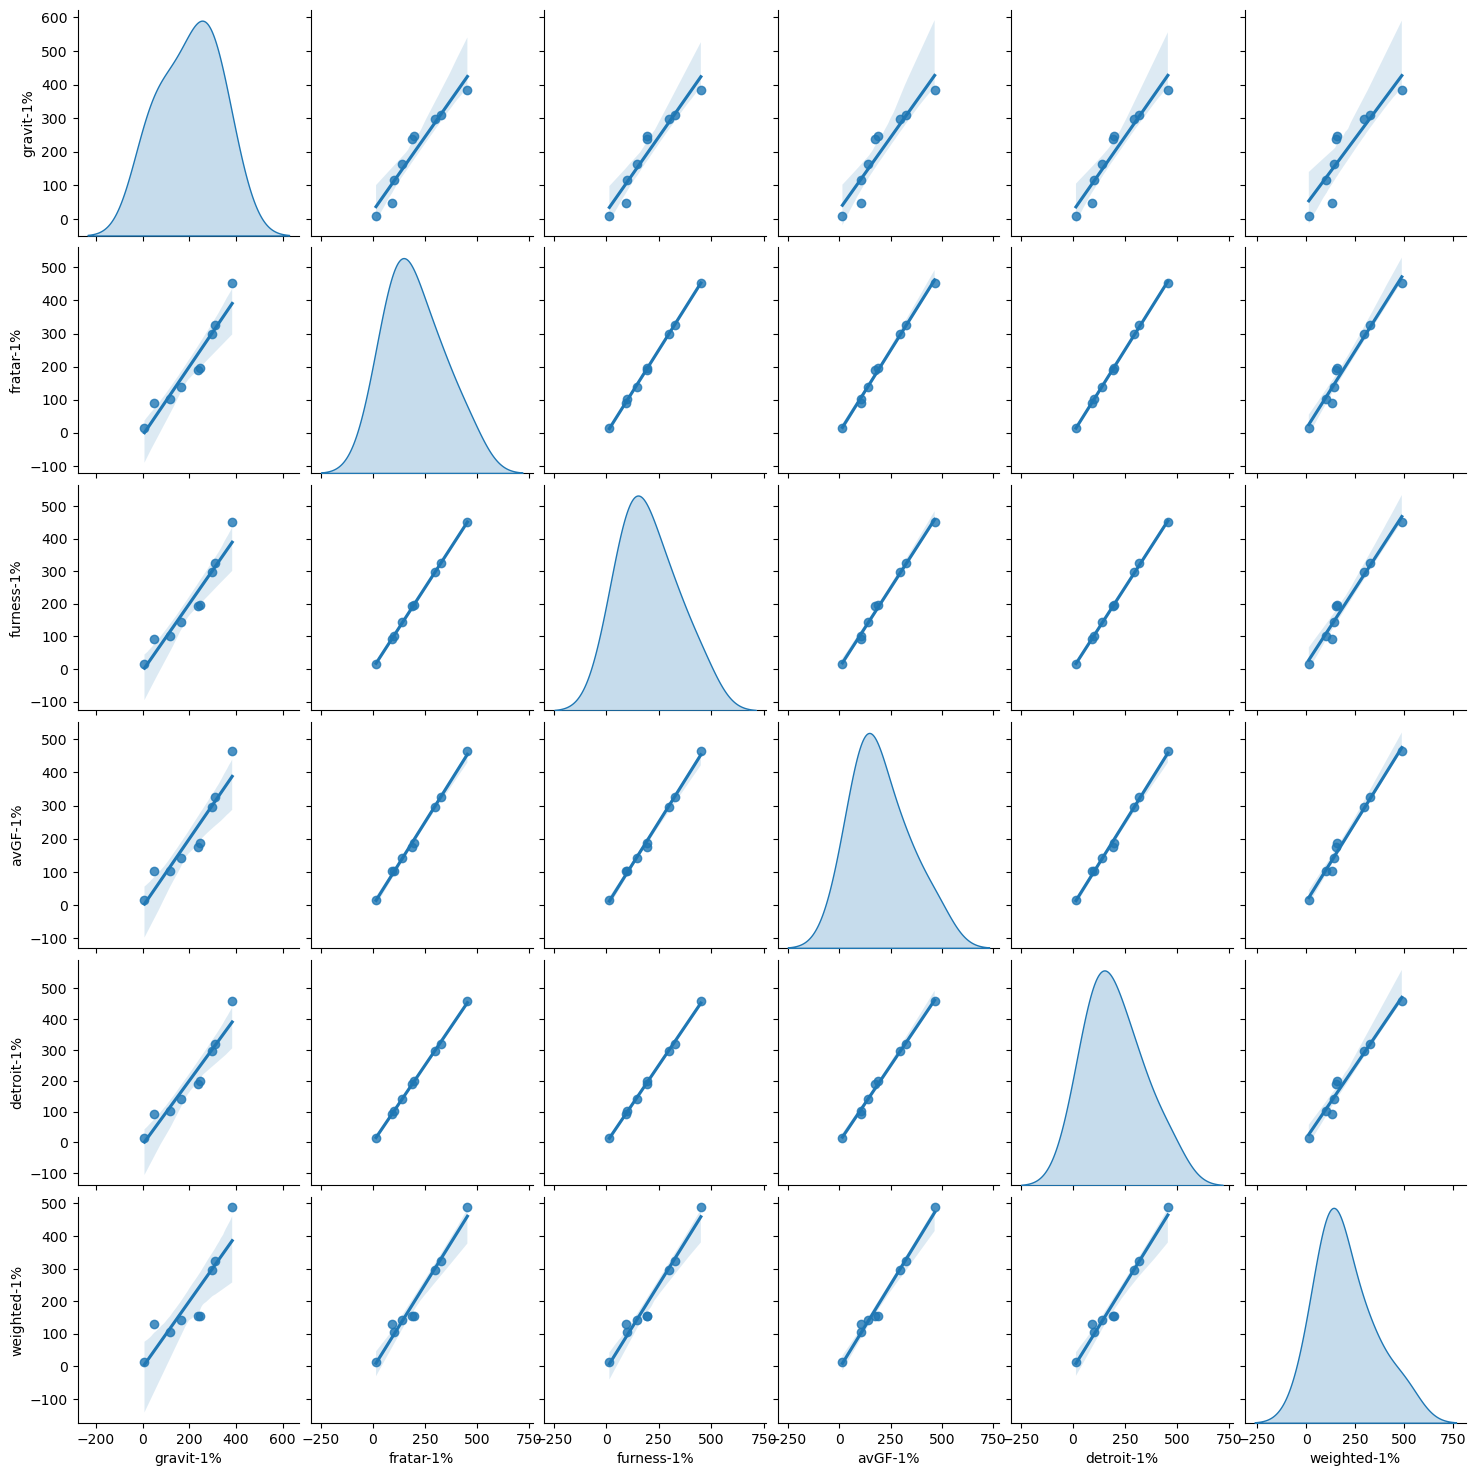

In [15]:
# plot of kernel density estimate (KDE) and regression between methods
sns.pairplot(all_travs1, kind='reg', diag_kind='kde')

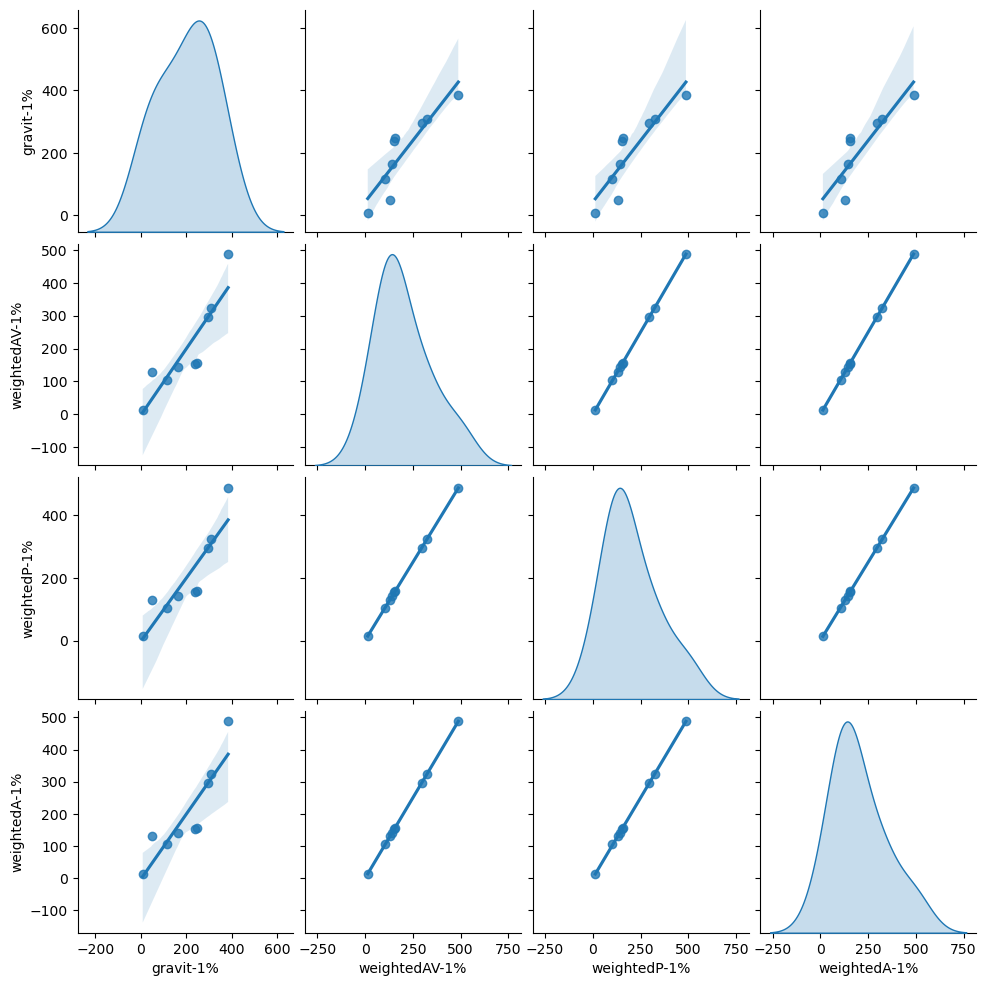

In [16]:
# plot of kernel density estimate (KDE) and regression between methods
sns.pairplot(wg_travs1, kind='reg', diag_kind='kde')

In [17]:
# sns.kdeplot(data=all_travs1['gravit'], fill=True)

In [18]:
# sns.jointplot(x=all_travs1['gravit'], y=all_travs1['weighted'], kind="kde")

#### Determine paired t-tests for the data sets
##### The data set generated with weighted method will be paired with each other data set, 
##### in order (i.e., gravitational, Fratar, Furness,average GF, and Detroit

In [19]:
# Comparing gravitational model with weighted data set

t_statistic, p_value = stats.ttest_rel(gvalsr_finflat1, travsc_wgtdflat1)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.01544
P-value: 0.98806
The difference between the models is not statistically significant.


In [20]:
# Comparing Fratar with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_fratflat1, travsc_wgtdflat1)

print(f"T-statistic: {t_statistic:5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.025358
P-value: 0.98039
The difference between the models is not statistically significant.


In [21]:
# Comparing Furness with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_furnflat1, travsc_wgtdflat1)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.03669
P-value: 0.97163
The difference between the models is not statistically significant.


In [22]:
# Comparing average GF with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_avgfflat1, travsc_wgtdflat1)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.01849
P-value: 0.98570
The difference between the models is not statistically significant.


In [23]:
# Comparing Detroit with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_detrflat1, travsc_wgtdflat1)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.03768
P-value: 0.97087
The difference between the models is not statistically significant.


#### <b style='color:blue'>%2 ACCURACY<b>

In [24]:
# Matrix of future travels obtained with gravitational model and ccoeffs matrix
gvalsr_fin2 = np.array([[115, 385, 251], [294, 238, 49], [307, 165, 8]])

# Matrix of travels obtained with Furness method
travsc_furn2 = np.array([[99, 452, 199], [292, 194, 94], [320, 145, 16]])

# Matrix of travels obtained with Fratar method
travsc_frat2 = np.array([[103, 459, 197], [298, 189, 90], [321, 138, 15]])

# Matrix of travels obtained with average growth factor
travsc_avgf2 = np.array([[105, 463, 188], [295, 173, 104], [326, 140, 15]])

# Matrix of travels obtained with Detroit method
travsc_detr2 = np.array([[103, 458, 199], [295, 191, 91], [318, 141, 15]])

# Matrix of travels obtained with weighted method (new method)
travsc_wgtd2 = np.array([[104, 488, 158], [294, 154, 130], [323, 143, 14]])   # averaged
travsc_wgtdP2 = np.array([[101, 485, 156], [294, 155, 132], [326, 145, 15]])  # starting from produced 
travsc_wgtdA2 = np.array([[107, 491, 160], [295, 154, 129], [320, 141, 13]])  # starting from attracted

#### Flatten the original arrays

In [25]:
gvalsr_finflat2 = gvalsr_fin2.flatten()

travsc_furnflat2 = travsc_furn2.flatten()

travsc_fratflat2 = travsc_frat2.flatten()

travsc_avgfflat2 = travsc_avgf2.flatten()

travsc_detrflat2 = travsc_detr2.flatten()

travsc_wgtdflat2 = travsc_wgtd2.flatten()

travsc_wgtdflatP2 = travsc_wgtdP2.flatten()

travsc_wgtdflatA2 = travsc_wgtdA2.flatten()

#### Create a df from flattened arrays

In [26]:
all_travs2 = pd.DataFrame(data=[gvalsr_finflat2, travsc_fratflat2,
                               travsc_furnflat2, travsc_avgfflat2,
                               travsc_detrflat2,travsc_wgtdflat2]).T
all_travs2.columns = ['gravit-2%', 'fratar-2%', 'furness-2%', 'avGF-2%', 'detroit-2%', 'weighted-2%']
all_travs2 = all_travs2.rename(index = row_nms)
all_travs2.head(9)

,gravit-2%,fratar-2%,furness-2%,avGF-2%,detroit-2%,weighted-2%
1-1,115,103,99,105,103,104
1-2,385,459,452,463,458,488
1-3,251,197,199,188,199,158
2-1,294,298,292,295,295,294
2-2,238,189,194,173,191,154
2-3,49,90,94,104,91,130
3-1,307,321,320,326,318,323
3-2,165,138,145,140,141,143
3-3,8,15,16,15,15,14


#### Create another df from gravity model and weighted method arrays

In [27]:
wg_travs2 = pd.DataFrame(data=[gvalsr_finflat2, travsc_wgtdflat2,
                               travsc_wgtdflatP2, travsc_wgtdflatA2]).T
wg_travs2.columns = ['gravit-2%', 'weightedAV-2%', 'weightedP-2%', 'weightedA-2%']
wg_travs2 = wg_travs2.rename(index = row_nms)
wg_travs2.head(9)

,gravit-2%,weightedAV-2%,weightedP-2%,weightedA-2%
1-1,115,104,101,107
1-2,385,488,485,491
1-3,251,158,156,160
2-1,294,294,294,295
2-2,238,154,155,154
2-3,49,130,132,129
3-1,307,323,326,320
3-2,165,143,145,141
3-3,8,14,15,13


In [97]:
# determine RMSE of GF methods/model in reference to gravity model to establish the importance of P and A
# perspectives
rmse_av = np.sqrt(np.mean((wg_travs2['weightedAV-2%'] - wg_travs2['gravit-2%']) ** 2))
for col in wg_travs2.iloc[:, 2:]:
    rmse = np.sqrt(np.mean((wg_travs2[col] - wg_travs2['gravit-2%']) ** 2))
    print('Delta RMSE for column, ',col, 'is ', f'{abs(rmse - rmse_av):.5f}')

Delta RMSE for column,  weightedP-2% is  0.03355
Delta RMSE for column,  weightedA-2% is  0.03264


#### Check correlation

In [29]:
# Pearson correlation table with colorscheme, all methods
all_travs2.corr().style.background_gradient(cmap='coolwarm')

,gravit-2%,fratar-2%,furness-2%,avGF-2%,detroit-2%,weighted-2%
gravit-2%,1.000000,0.954678,0.957728,0.937203,0.956180,0.890258
fratar-2%,0.954678,1.000000,0.999562,0.998044,0.999910,0.984007
furness-2%,0.957728,0.999562,1.000000,0.997217,0.999746,0.982443
avGF-2%,0.937203,0.998044,0.997217,1.000000,0.997671,0.992463
detroit-2%,0.956180,0.999910,0.999746,0.997671,1.000000,0.983345
weighted-2%,0.890258,0.984007,0.982443,0.992463,0.983345,1.000000


In [30]:
# Pearson correlation table with colorscheme, all methods
wg_travs2.corr().style.background_gradient(cmap='coolwarm')

,gravit-2%,weightedAV-2%,weightedP-2%,weightedA-2%
gravit-2%,1.000000,0.890258,0.889247,0.891034
weightedAV-2%,0.890258,1.000000,0.999881,0.999892
weightedP-2%,0.889247,0.999881,1.000000,0.999551
weightedA-2%,0.891034,0.999892,0.999551,1.000000


#### Get the stats tableau and median for each column in dfs

In [31]:
all_travs2.describe()

,gravit-2%,fratar-2%,furness-2%,avGF-2%,detroit-2%,weighted-2%
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,201.333333,201.111111,201.222222,201.000000,201.222222,200.888889
std,125.824282,137.396729,134.494217,137.386317,136.279839,142.628402
min,8.000000,15.000000,16.000000,15.000000,15.000000,14.000000
25%,115.000000,103.000000,99.000000,105.000000,103.000000,130.000000
50%,238.000000,189.000000,194.000000,173.000000,191.000000,154.000000
75%,294.000000,298.000000,292.000000,295.000000,295.000000,294.000000
max,385.000000,459.000000,452.000000,463.000000,458.000000,488.000000


In [32]:
for col in all_travs2.describe().iloc[:, :]:
    print('IQR for col ', col, 'is ', all_travs2.describe().loc['75%', col] - all_travs2.describe().loc['25%', col])

IQR for col  gravit-2% is  179.0
IQR for col  fratar-2% is  195.0
IQR for col  furness-2% is  193.0
IQR for col  avGF-2% is  190.0
IQR for col  detroit-2% is  192.0
IQR for col  weighted-2% is  164.0


In [33]:
wg_travs2.describe()

,gravit-2%,weightedAV-2%,weightedP-2%,weightedA-2%
count,9.000000,9.000000,9.000000,9.000000
mean,201.333333,200.888889,201.000000,201.111111
std,125.824282,142.628402,142.110872,143.156771
min,8.000000,14.000000,15.000000,13.000000
25%,115.000000,130.000000,132.000000,129.000000
50%,238.000000,154.000000,155.000000,154.000000
75%,294.000000,294.000000,294.000000,295.000000
max,385.000000,488.000000,485.000000,491.000000


<Axes: >

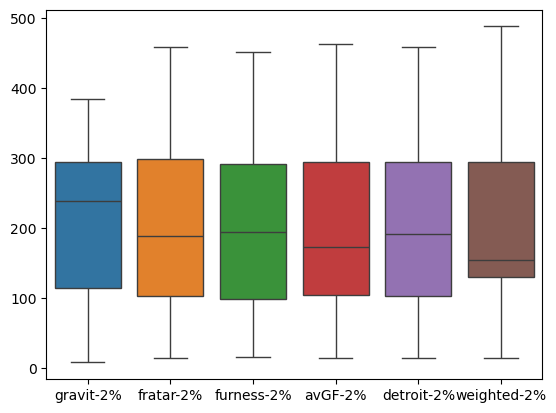

In [34]:
sns.boxplot(all_travs2)

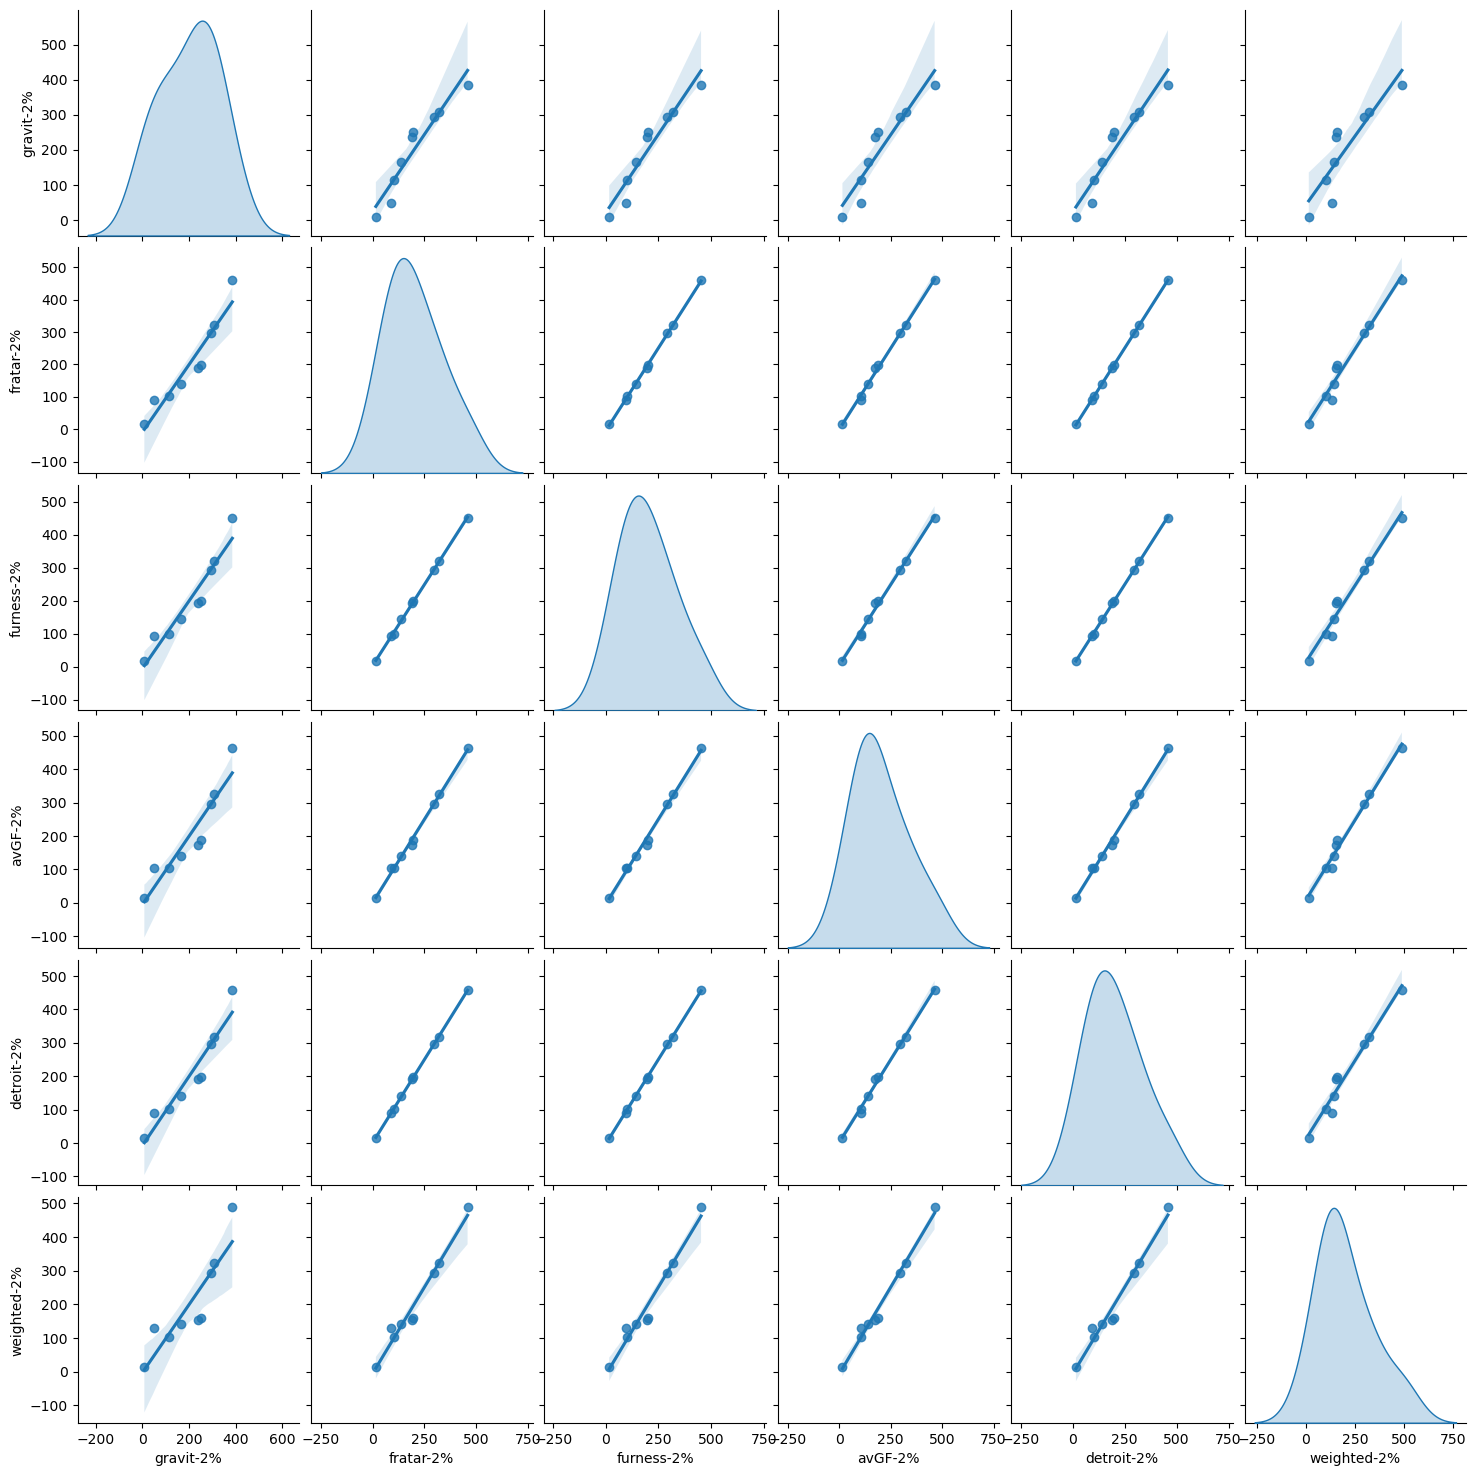

In [35]:
# plot of kernel density estimate (KDE) and regression between methods
sns.pairplot(all_travs2, kind='reg', diag_kind='kde')

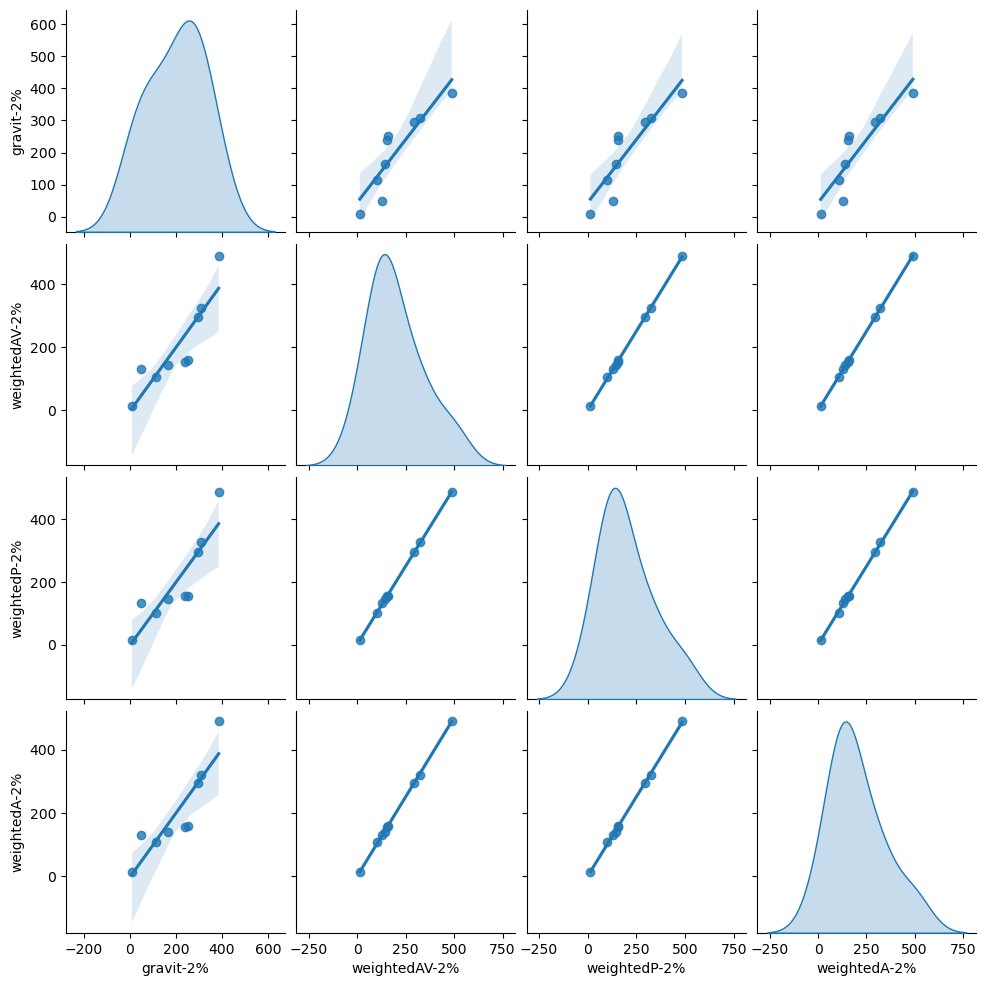

In [36]:
# plot of kernel density estimate (KDE) and regression between methods
sns.pairplot(wg_travs2, kind='reg', diag_kind='kde')

#### Determine paired t-tests for the data sets
##### The data set generated with weighted method will be paired with each other data set, 
##### in order (i.e., gravitational, Fratar, Furness,average GF, and Detroit

In [37]:
# Comparing gravitational model with weighted data set

t_statistic, p_value = stats.ttest_rel(gvalsr_finflat2, travsc_wgtdflat2)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.02052
P-value: 0.98413
The difference between the models is not statistically significant.


In [38]:
# Comparing Fratar with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_fratflat2, travsc_wgtdflat2)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.02606
P-value: 0.97984
The difference between the models is not statistically significant.


In [39]:
# Comparing Furness with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_furnflat2, travsc_wgtdflat2)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.03677
P-value: 0.97157
The difference between the models is not statistically significant.


In [40]:
# Comparing average GF with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_avgfflat2, travsc_wgtdflat2)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.01855
P-value: 0.98565
The difference between the models is not statistically significant.


In [41]:
# Comparing Detroit with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_detrflat2, travsc_wgtdflat2)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.03813
P-value: 0.97052
The difference between the models is not statistically significant.


#### <b style='color:blue'>%3 ACCURACY<b>

In [42]:
# Matrix of future travels obtained with gravitational model and ccoeffs matrix
gvalsr_fin3 = np.array([[114, 385, 244], [298, 240, 50], [310, 171, 8]])

# Matrix of travels obtained with Furness method
travsc_furn3 = np.array([[99, 452, 199], [292, 194, 94], [320, 145, 16]])

# Matrix of travels obtained with Fratar method
travsc_frat3 = np.array([[105, 452, 192], [306, 186, 88], [330, 136, 14]])

# Matrix of travels obtained with average growth factor
travsc_avgf3 = np.array([[105, 462, 187], [298, 174, 105], [325, 140, 15]])

# Matrix of travels obtained with Detroit method
travsc_detr3 = np.array([[103, 443, 190], [305, 190, 90], [333, 142, 15]])

# Matrix of travels obtained with weighted method (new method)
travsc_wgtd3 = np.array([[105, 486, 154], [296, 154, 130], [326, 142, 14]])   # averaged
travsc_wgtdP3 = np.array([[101, 485, 156], [294, 155, 132], [326, 145, 15]])  # starting from produced 
travsc_wgtdA3 = np.array([[109, 488, 153], [299, 154, 128], [327, 140, 13]])  # starting from attracted

#### Flatten the original arrays

In [43]:
gvalsr_finflat3 = gvalsr_fin3.flatten()

travsc_furnflat3 = travsc_furn3.flatten()

travsc_fratflat3 = travsc_frat3.flatten()

travsc_avgfflat3 = travsc_avgf3.flatten()

travsc_detrflat3 = travsc_detr3.flatten()

travsc_wgtdflat3 = travsc_wgtd3.flatten()

travsc_wgtdflatP3 = travsc_wgtdP3.flatten()

travsc_wgtdflatA3 = travsc_wgtdA3.flatten()

#### Create a df from flattened arrays

In [44]:
all_travs3 = pd.DataFrame(data=[gvalsr_finflat3, travsc_fratflat3,
                               travsc_furnflat3, travsc_avgfflat3,
                               travsc_detrflat3,travsc_wgtdflat3]).T
all_travs3.columns = ['gravit-3%', 'fratar-3%', 'furness-3%', 'avGF-3%', 'detroit-3%', 'weighted-3%']
all_travs3 = all_travs3.rename(index = row_nms)
all_travs3.head(9)

,gravit-3%,fratar-3%,furness-3%,avGF-3%,detroit-3%,weighted-3%
1-1,114,105,99,105,103,105
1-2,385,452,452,462,443,486
1-3,244,192,199,187,190,154
2-1,298,306,292,298,305,296
2-2,240,186,194,174,190,154
2-3,50,88,94,105,90,130
3-1,310,330,320,325,333,326
3-2,171,136,145,140,142,142
3-3,8,14,16,15,15,14


#### Create another df from gravity model and weighted method arrays

In [45]:
wg_travs3 = pd.DataFrame(data=[gvalsr_finflat3, travsc_wgtdflat3,
                               travsc_wgtdflatP3, travsc_wgtdflatA3]).T
wg_travs3.columns = ['gravit-3%', 'weightedAV-3%', 'weightedP-3%', 'weightedA-3%']
wg_travs3 = wg_travs3.rename(index = row_nms)
wg_travs3.head(9)

,gravit-3%,weightedAV-3%,weightedP-3%,weightedA-3%
1-1,114,105,101,109
1-2,385,486,485,488
1-3,244,154,156,153
2-1,298,296,294,299
2-2,240,154,155,154
2-3,50,130,132,128
3-1,310,326,326,327
3-2,171,142,145,140
3-3,8,14,15,13


In [98]:
# determine RMSE of GF methods/model in reference to gravity model to establish the importance of P and A
# perspectives
rmse_av = np.sqrt(np.mean((wg_travs3['weightedAV-3%'] - wg_travs3['gravit-3%']) ** 2))
for col in wg_travs3.iloc[:, 2:]:
    rmse = np.sqrt(np.mean((wg_travs3[col] - wg_travs3['gravit-3%']) ** 2))
    print('Delta RMSE for column, ',col, 'is ', f'{abs(rmse - rmse_av):.5f}')

Delta RMSE for column,  weightedP-3% is  0.41782
Delta RMSE for column,  weightedA-3% is  0.32421


#### Check correlation

In [47]:
# Pearson correlation table with colorscheme, all methods
all_travs3.corr().style.background_gradient(cmap='coolwarm')

,gravit-3%,fratar-3%,furness-3%,avGF-3%,detroit-3%,weighted-3%
gravit-3%,1.000000,0.956078,0.959131,0.939029,0.958925,0.892085
fratar-3%,0.956078,1.000000,0.998409,0.997822,0.999626,0.983005
furness-3%,0.959131,0.998409,1.000000,0.997190,0.998119,0.981664
avGF-3%,0.939029,0.997822,0.997190,1.000000,0.996804,0.992174
detroit-3%,0.958925,0.999626,0.998119,0.996804,1.000000,0.981386
weighted-3%,0.892085,0.983005,0.981664,0.992174,0.981386,1.000000


In [48]:
# Pearson correlation table with colorscheme, all methods
wg_travs3.corr().style.background_gradient(cmap='coolwarm')

,gravit-3%,weightedAV-3%,weightedP-3%,weightedA-3%
gravit-3%,1.000000,0.892085,0.892602,0.892471
weightedAV-3%,0.892085,1.000000,0.999888,0.999906
weightedP-3%,0.892602,0.999888,1.000000,0.999593
weightedA-3%,0.892471,0.999906,0.999593,1.000000


#### Get the stats tableau and median for each column in dfs

In [49]:
all_travs3.describe()

,gravit-3%,fratar-3%,furness-3%,avGF-3%,detroit-3%,weighted-3%
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,202.222222,201.000000,201.222222,201.222222,201.222222,200.777778
std,126.006724,137.909391,134.494217,137.194914,135.576342,142.740830
min,8.000000,14.000000,16.000000,15.000000,15.000000,14.000000
25%,114.000000,105.000000,99.000000,105.000000,103.000000,130.000000
50%,240.000000,186.000000,194.000000,174.000000,190.000000,154.000000
75%,298.000000,306.000000,292.000000,298.000000,305.000000,296.000000
max,385.000000,452.000000,452.000000,462.000000,443.000000,486.000000


In [50]:
for col in all_travs3.describe().iloc[:, :]:
    print('IQR for col ', col, 'is ', all_travs3.describe().loc['75%', col] - all_travs3.describe().loc['25%', col])

IQR for col  gravit-3% is  184.0
IQR for col  fratar-3% is  201.0
IQR for col  furness-3% is  193.0
IQR for col  avGF-3% is  193.0
IQR for col  detroit-3% is  202.0
IQR for col  weighted-3% is  166.0


In [51]:
wg_travs3.describe()

,gravit-3%,weightedAV-3%,weightedP-3%,weightedA-3%
count,9.000000,9.000000,9.000000,9.000000
mean,202.222222,200.777778,201.000000,201.222222
std,126.006724,142.740830,142.110872,143.709584
min,8.000000,14.000000,15.000000,13.000000
25%,114.000000,130.000000,132.000000,128.000000
50%,240.000000,154.000000,155.000000,153.000000
75%,298.000000,296.000000,294.000000,299.000000
max,385.000000,486.000000,485.000000,488.000000


<Axes: >

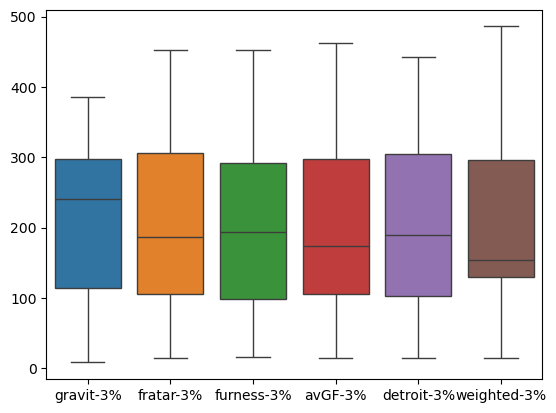

In [52]:
sns.boxplot(all_travs3)

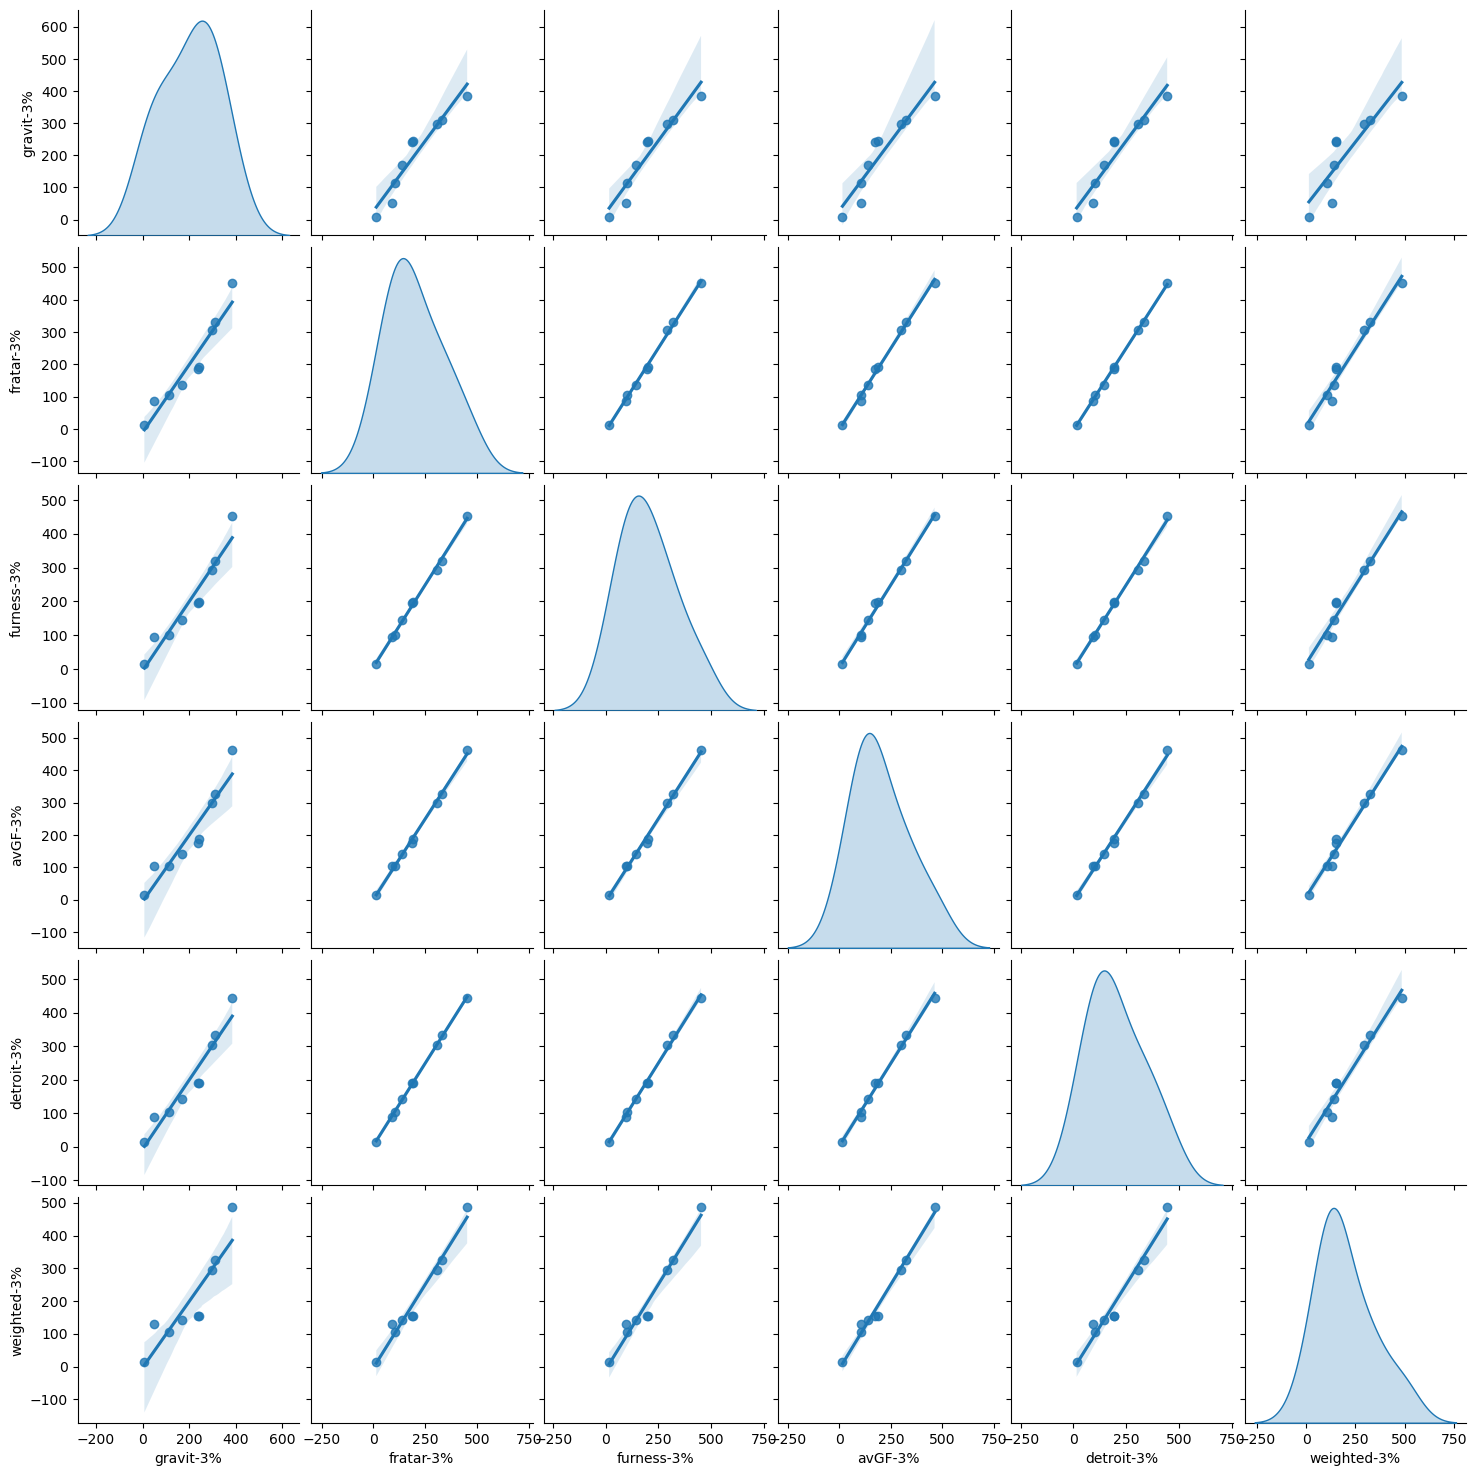

In [53]:
# plot of kernel density estimate (KDE) and regression between methods
sns.pairplot(all_travs3, kind='reg', diag_kind='kde')

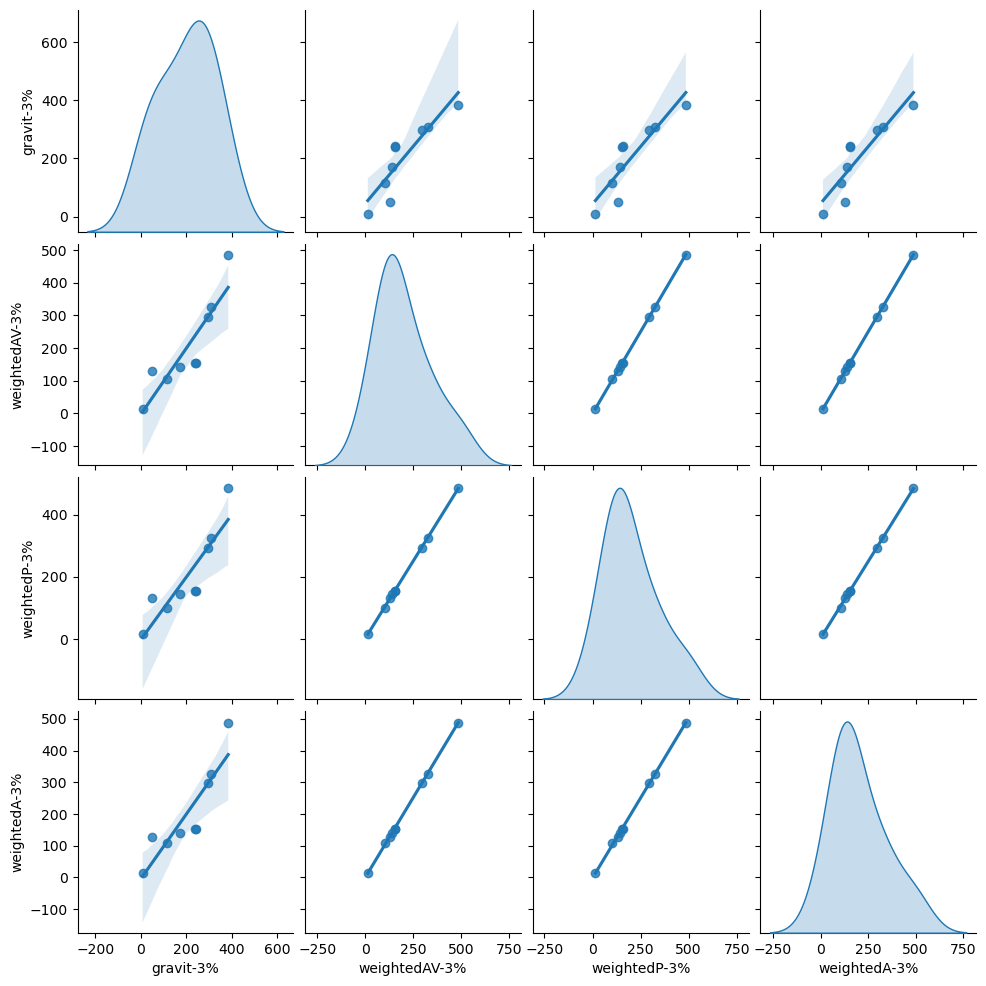

In [54]:
# plot of kernel density estimate (KDE) and regression between methods
sns.pairplot(wg_travs3, kind='reg', diag_kind='kde')

#### Determine paired t-tests for the data sets
##### The data set generated with weighted method will be paired with each other data set, 
##### in order (i.e., gravitational, Fratar, Furness,average GF, and Detroit

In [55]:
# Comparing gravitational model with weighted data set

t_statistic, p_value = stats.ttest_rel(gvalsr_finflat3, travsc_wgtdflat3)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.06717
P-value: 0.94810
The difference between the models is not statistically significant.


In [56]:
# Comparing Fratar with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_fratflat3, travsc_wgtdflat3)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.02533
P-value: 0.98041
The difference between the models is not statistically significant.


In [57]:
# Comparing Furness with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_furnflat3, travsc_wgtdflat3)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.04799
P-value: 0.96290
The difference between the models is not statistically significant.


In [58]:
# Comparing average GF with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_avgfflat3, travsc_wgtdflat3)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.07260
P-value: 0.94391
The difference between the models is not statistically significant.


In [59]:
# Comparing Detroit with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_detrflat3, travsc_wgtdflat3)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.04799
P-value: 0.96290
The difference between the models is not statistically significant.


#### <b style='color:blue'>%4 ACCURACY<b>

In [60]:
# Matrix of future travels obtained with gravitational model and ccoeffs matrix
gvalsr_fin4 = np.array([[114, 375, 244], [298, 240, 50], [310, 171, 8]])

# Matrix of travels obtained with Furness method
travsc_furn4 = np.array([[99, 452, 199], [292, 194, 94], [320, 145, 16]])

# Matrix of travels obtained with Fratar method
travsc_frat4 = np.array([[105, 452, 192], [306, 186, 88], [330, 136, 14]])

# Matrix of travels obtained with average growth factor
travsc_avgf4 = np.array([[105, 459, 191], [298, 172, 106], [327, 138, 15]])

# Matrix of travels obtained with Detroit method
travsc_detr4 = np.array([[103, 443, 190], [305, 190, 90], [333, 142, 15]])

# Matrix of travels obtained with weighted method (new method)
travsc_wgtd4 = np.array([[105, 492, 164], [294, 154, 130], [316, 142, 13]])   # averaged
travsc_wgtdP4 = np.array([[98, 487, 164], [291, 156, 133], [319, 146, 15]])   # starting from produced 
travsc_wgtdA4 = np.array([[112, 497, 164], [296, 153, 126], [314, 137, 11]])   # starting from attracted

#### Flatten the original arrays

In [61]:
gvalsr_finflat4 = gvalsr_fin4.flatten()

travsc_furnflat4 = travsc_furn4.flatten()

travsc_fratflat4 = travsc_frat4.flatten()

travsc_avgfflat4 = travsc_avgf4.flatten()

travsc_detrflat4 = travsc_detr4.flatten()

travsc_wgtdflat4 = travsc_wgtd4.flatten()

travsc_wgtdflatP4 = travsc_wgtdP4.flatten()

travsc_wgtdflatA4 = travsc_wgtdA4.flatten()

#### Create a df from flattened arrays

In [62]:
all_travs4 = pd.DataFrame(data=[gvalsr_finflat4, travsc_fratflat4,
                               travsc_furnflat4, travsc_avgfflat4,
                               travsc_detrflat4,travsc_wgtdflat4]).T
all_travs4.columns = ['gravit-4%', 'fratar-4%', 'furness-4%', 'avGF-4%', 'detroit-4%', 'weighted-4%']
all_travs4 = all_travs4.rename(index = row_nms)
all_travs4.head(9)

,gravit-4%,fratar-4%,furness-4%,avGF-4%,detroit-4%,weighted-4%
1-1,114,105,99,105,103,105
1-2,375,452,452,459,443,492
1-3,244,192,199,191,190,164
2-1,298,306,292,298,305,294
2-2,240,186,194,172,190,154
2-3,50,88,94,106,90,130
3-1,310,330,320,327,333,316
3-2,171,136,145,138,142,142
3-3,8,14,16,15,15,13


#### Create another df from gravity model and weighted method arrays

In [63]:
wg_travs4 = pd.DataFrame(data=[gvalsr_finflat4, travsc_wgtdflat4,
                               travsc_wgtdflatP4, travsc_wgtdflatA4]).T
wg_travs4.columns = ['gravit-4%', 'weightedAV-4%', 'weightedP-4%', 'weightedA-4%']
wg_travs4 = wg_travs4.rename(index = row_nms)
wg_travs4.head(9)

,gravit-4%,weightedAV-4%,weightedP-4%,weightedA-4%
1-1,114,105,98,112
1-2,375,492,487,497
1-3,244,164,164,164
2-1,298,294,291,296
2-2,240,154,156,153
2-3,50,130,133,126
3-1,310,316,319,314
3-2,171,142,146,137
3-3,8,13,15,11


In [99]:
# determine RMSE of GF methods/model in reference to gravity model to establish the importance of P and A
# perspectives
rmse_av = np.sqrt(np.mean((wg_travs4['weightedAV-4%'] - wg_travs4['gravit-4%']) ** 2))
for col in wg_travs4.iloc[:, 2:]:
    rmse = np.sqrt(np.mean((wg_travs4[col] - wg_travs4['gravit-4%']) ** 2))
    print('Delta RMSE for column, ',col, 'is ', f'{abs(rmse - rmse_av):.5f}')

Delta RMSE for column,  weightedP-4% is  0.84001
Delta RMSE for column,  weightedA-4% is  0.82795


#### Check correlation

In [65]:
# Pearson correlation table with colorscheme, all methods
all_travs4.corr().style.background_gradient(cmap='coolwarm')

,gravit-4%,fratar-4%,furness-4%,avGF-4%,detroit-4%,weighted-4%
gravit-4%,1.000000,0.951476,0.954125,0.934220,0.954733,0.886885
fratar-4%,0.951476,1.000000,0.998409,0.997890,0.999626,0.983010
furness-4%,0.954125,0.998409,1.000000,0.997039,0.998119,0.982957
avGF-4%,0.934220,0.997890,0.997039,1.000000,0.996861,0.991750
detroit-4%,0.954733,0.999626,0.998119,0.996861,1.000000,0.980734
weighted-4%,0.886885,0.983010,0.982957,0.991750,0.980734,1.000000


In [66]:
# Pearson correlation table with colorscheme, all methods
wg_travs4.corr().style.background_gradient(cmap='coolwarm')

,gravit-4%,weightedAV-4%,weightedP-4%,weightedA-4%
gravit-4%,1.000000,0.886885,0.887693,0.886560
weightedAV-4%,0.886885,1.000000,0.999661,0.999672
weightedP-4%,0.887693,0.999661,1.000000,0.998681
weightedA-4%,0.886560,0.999672,0.998681,1.000000


#### Get the stats tableau and median for each column in dfs

In [67]:
all_travs4.describe()

,gravit-4%,fratar-4%,furness-4%,avGF-4%,detroit-4%,weighted-4%
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,201.111111,201.000000,201.222222,201.222222,201.222222,201.111111
std,124.225042,137.909391,134.494217,136.745912,135.576342,142.835084
min,8.000000,14.000000,16.000000,15.000000,15.000000,13.000000
25%,114.000000,105.000000,99.000000,106.000000,103.000000,130.000000
50%,240.000000,186.000000,194.000000,172.000000,190.000000,154.000000
75%,298.000000,306.000000,292.000000,298.000000,305.000000,294.000000
max,375.000000,452.000000,452.000000,459.000000,443.000000,492.000000


In [68]:
for col in all_travs4.describe().iloc[:, :]:
    print('IQR for col ', col, 'is ', all_travs4.describe().loc['75%', col] - all_travs4.describe().loc['25%', col])

IQR for col  gravit-4% is  184.0
IQR for col  fratar-4% is  201.0
IQR for col  furness-4% is  193.0
IQR for col  avGF-4% is  192.0
IQR for col  detroit-4% is  202.0
IQR for col  weighted-4% is  164.0


In [69]:
wg_travs4.describe()

,gravit-4%,weightedAV-4%,weightedP-4%,weightedA-4%
count,9.000000,9.000000,9.000000,9.000000
mean,201.111111,201.111111,201.000000,201.111111
std,124.225042,142.835084,141.451405,144.406063
min,8.000000,13.000000,15.000000,11.000000
25%,114.000000,130.000000,133.000000,126.000000
50%,240.000000,154.000000,156.000000,153.000000
75%,298.000000,294.000000,291.000000,296.000000
max,375.000000,492.000000,487.000000,497.000000


<Axes: >

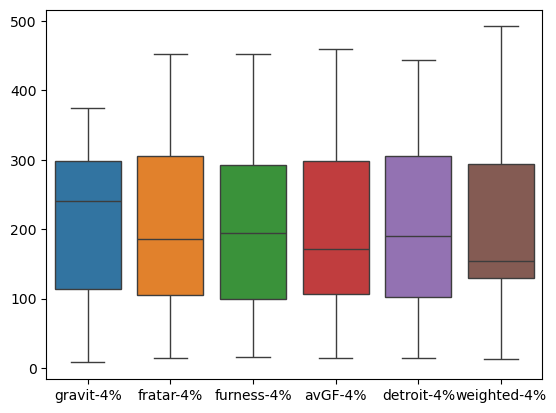

In [70]:
sns.boxplot(all_travs4)

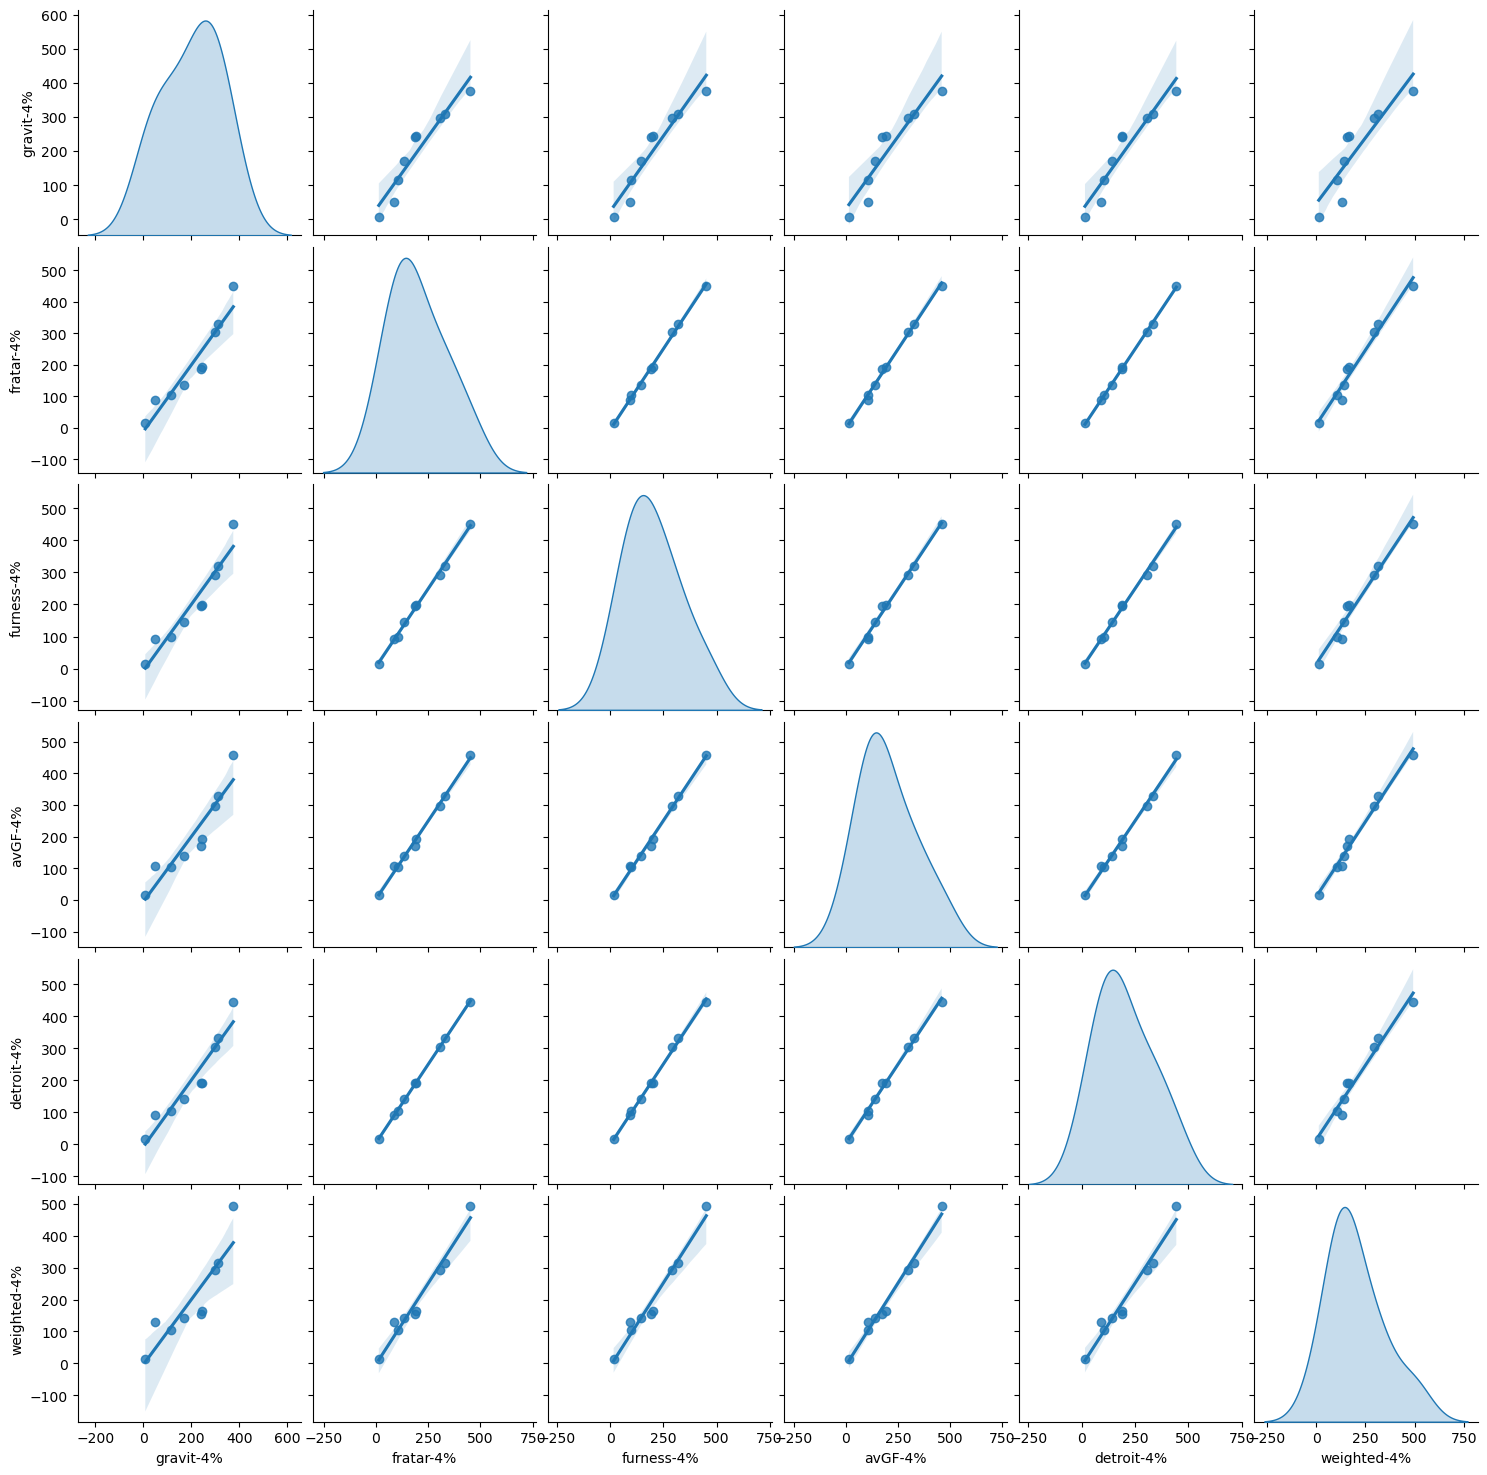

In [71]:
# plot of kernel density estimate (KDE) and regression between methods
sns.pairplot(all_travs4, kind='reg', diag_kind='kde')

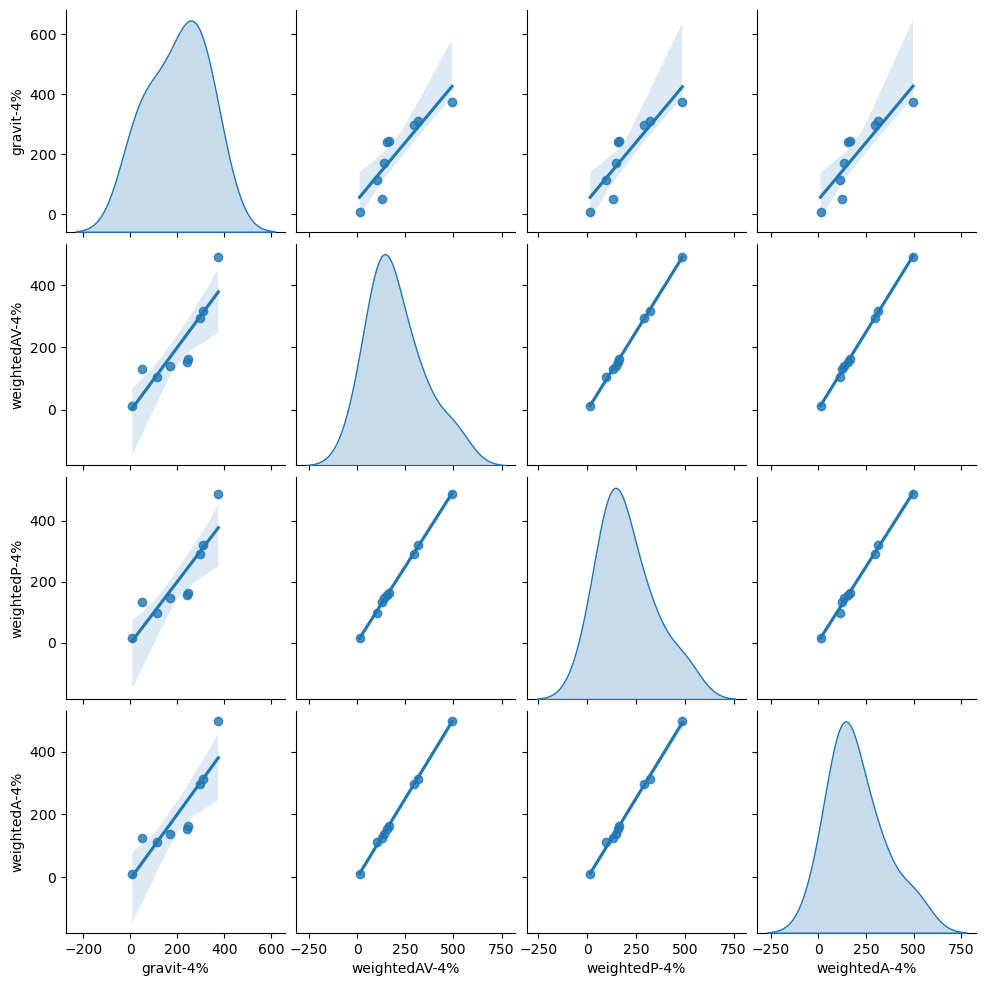

In [72]:
# plot of kernel density estimate (KDE) and regression between methods
sns.pairplot(wg_travs4, kind='reg', diag_kind='kde')

#### Determine paired t-tests for the data sets
##### The data set generated with weighted method will be paired with each other data set, 
##### in order (i.e., gravitational, Fratar, Furness,average GF, and Detroit

In [73]:
# Comparing gravitational model with weighted data set

t_statistic, p_value = stats.ttest_rel(gvalsr_finflat4, travsc_wgtdflat4)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.00000
P-value: 1.00000
The difference between the models is not statistically significant.


In [74]:
# Comparing Fratar with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_fratflat4, travsc_wgtdflat4)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: -0.01266
P-value: 0.99021
The difference between the models is not statistically significant.


In [75]:
# Comparing Furness with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_furnflat4, travsc_wgtdflat4)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.01239
P-value: 0.99042
The difference between the models is not statistically significant.


In [76]:
# Comparing average GF with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_avgfflat4, travsc_wgtdflat4)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.01758
P-value: 0.98640
The difference between the models is not statistically significant.


In [77]:
# Comparing Detroit with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_detrflat4, travsc_wgtdflat4)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.01179
P-value: 0.99088
The difference between the models is not statistically significant.


#### <b style='color:blue'>%5 ACCURACY<b>

In [78]:
# Matrix of future travels obtained with gravitational model and ccoeffs matrix
gvalsr_fin5 = np.array([[114, 375, 244], [298, 240, 50], [310, 171, 8]])

# Matrix of travels obtained with Furness method
travsc_furn5 = np.array([[99, 452, 199], [292, 194, 94], [320, 145, 16]])

# Matrix of travels obtained with Fratar method
travsc_frat5 = np.array([[105, 452, 192], [306, 186, 88], [330, 136, 14]])

# Matrix of travels obtained with average growth factor
travsc_avgf5 = np.array([[105, 459, 191], [298, 172, 106], [327, 138, 15]])

# Matrix of travels obtained with Detroit method
travsc_detr5 = np.array([[98, 464, 204], [285, 196, 95], [310, 146, 16]])

# Matrix of travels obtained with weighted method (new method)
travsc_wgtd5 = np.array([[105, 492, 164], [294, 154, 130], [316, 142, 13]])   # averaged
travsc_wgtdP5 = np.array([[98, 487, 164], [291, 156, 133], [319, 146, 15]])   # starting from produced 
travsc_wgtdA5 = np.array([[112, 497, 164], [296, 153, 126], [314, 137, 11]])   # starting from attracted

#### Flatten the original arrays

In [79]:
gvalsr_finflat5 = gvalsr_fin5.flatten()

travsc_furnflat5 = travsc_furn5.flatten()

travsc_fratflat5 = travsc_frat5.flatten()

travsc_avgfflat5 = travsc_avgf5.flatten()

travsc_detrflat5 = travsc_detr5.flatten()

travsc_wgtdflat5 = travsc_wgtd5.flatten()

travsc_wgtdflatP5 = travsc_wgtdP5.flatten()

travsc_wgtdflatA5 = travsc_wgtdA5.flatten()

#### Create a df from flattened arrays

In [80]:
all_travs5 = pd.DataFrame(data=[gvalsr_finflat5, travsc_fratflat5,
                               travsc_furnflat5, travsc_avgfflat5,
                               travsc_detrflat5,travsc_wgtdflat5]).T
all_travs5.columns = ['gravit-5%', 'fratar-5%', 'furness-5%', 'avGF-5%', 'detroit-5%', 'weighted-5%']
all_travs5 = all_travs5.rename(index = row_nms)
all_travs5.head(9)

,gravit-5%,fratar-5%,furness-5%,avGF-5%,detroit-5%,weighted-5%
1-1,114,105,99,105,98,105
1-2,375,452,452,459,464,492
1-3,244,192,199,191,204,164
2-1,298,306,292,298,285,294
2-2,240,186,194,172,196,154
2-3,50,88,94,106,95,130
3-1,310,330,320,327,310,316
3-2,171,136,145,138,146,142
3-3,8,14,16,15,16,13


#### Create another df from gravity model and weighted method arrays

In [81]:
wg_travs5 = pd.DataFrame(data=[gvalsr_finflat5, travsc_wgtdflat5,
                               travsc_wgtdflatP5, travsc_wgtdflatA5]).T
wg_travs5.columns = ['gravit-5%', 'weightedAV-5%', 'weightedP-5%', 'weightedA-5%']
wg_travs5 = wg_travs5.rename(index = row_nms)
wg_travs5.head(9)

,gravit-5%,weightedAV-5%,weightedP-5%,weightedA-5%
1-1,114,105,98,112
1-2,375,492,487,497
1-3,244,164,164,164
2-1,298,294,291,296
2-2,240,154,156,153
2-3,50,130,133,126
3-1,310,316,319,314
3-2,171,142,146,137
3-3,8,13,15,11


In [101]:
# determine RMSE of GF methods/model in reference to gravity model to establish the importance of P and A
# perspectives
rmse_av = np.sqrt(np.mean((wg_travs5['weightedAV-5%'] - wg_travs5['gravit-5%']) ** 2))
for col in wg_travs5.iloc[:, 2:]:
    rmse = np.sqrt(np.mean((wg_travs5[col] - wg_travs5['gravit-5%']) ** 2))
    print('Delta RMSE for column, ',col, 'is ', f'{abs(rmse - rmse_av):.5f}')

Delta RMSE for column,  weightedP-5% is  0.84001
Delta RMSE for column,  weightedA-5% is  0.82795


#### Check correlation

In [83]:
# Pearson correlation table with colorscheme, all methods
all_travs5.corr().style.background_gradient(cmap='coolwarm')

,gravit-5%,fratar-5%,furness-5%,avGF-5%,detroit-5%,weighted-5%
gravit-5%,1.000000,0.951476,0.954125,0.934220,0.949756,0.886885
fratar-5%,0.951476,1.000000,0.998409,0.997890,0.995364,0.983010
furness-5%,0.954125,0.998409,1.000000,0.997039,0.998927,0.982957
avGF-5%,0.934220,0.997890,0.997039,1.000000,0.995106,0.991750
detroit-5%,0.949756,0.995364,0.998927,0.995106,1.000000,0.983387
weighted-5%,0.886885,0.983010,0.982957,0.991750,0.983387,1.000000


In [84]:
# Pearson correlation table with colorscheme, all methods
wg_travs5.corr().style.background_gradient(cmap='coolwarm')

,gravit-5%,weightedAV-5%,weightedP-5%,weightedA-5%
gravit-5%,1.000000,0.886885,0.887693,0.886560
weightedAV-5%,0.886885,1.000000,0.999661,0.999672
weightedP-5%,0.887693,0.999661,1.000000,0.998681
weightedA-5%,0.886560,0.999672,0.998681,1.000000


#### Get the stats tableau and median for each column in dfs

In [85]:
all_travs5.describe()

,gravit-5%,fratar-5%,furness-5%,avGF-5%,detroit-5%,weighted-5%
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,201.111111,201.000000,201.222222,201.222222,201.555556,201.111111
std,124.225042,137.909391,134.494217,136.745912,135.661445,142.835084
min,8.000000,14.000000,16.000000,15.000000,16.000000,13.000000
25%,114.000000,105.000000,99.000000,106.000000,98.000000,130.000000
50%,240.000000,186.000000,194.000000,172.000000,196.000000,154.000000
75%,298.000000,306.000000,292.000000,298.000000,285.000000,294.000000
max,375.000000,452.000000,452.000000,459.000000,464.000000,492.000000


In [86]:
for col in all_travs5.describe().iloc[:, :]:
    print('IQR for col ', col, 'is ', all_travs5.describe().loc['75%', col] - all_travs5.describe().loc['25%', col])

IQR for col  gravit-5% is  184.0
IQR for col  fratar-5% is  201.0
IQR for col  furness-5% is  193.0
IQR for col  avGF-5% is  192.0
IQR for col  detroit-5% is  187.0
IQR for col  weighted-5% is  164.0


In [87]:
wg_travs5.describe()

,gravit-5%,weightedAV-5%,weightedP-5%,weightedA-5%
count,9.000000,9.000000,9.000000,9.000000
mean,201.111111,201.111111,201.000000,201.111111
std,124.225042,142.835084,141.451405,144.406063
min,8.000000,13.000000,15.000000,11.000000
25%,114.000000,130.000000,133.000000,126.000000
50%,240.000000,154.000000,156.000000,153.000000
75%,298.000000,294.000000,291.000000,296.000000
max,375.000000,492.000000,487.000000,497.000000


<Axes: >

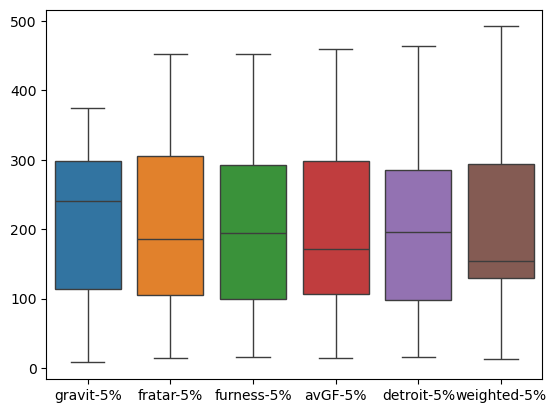

In [88]:
sns.boxplot(all_travs5)

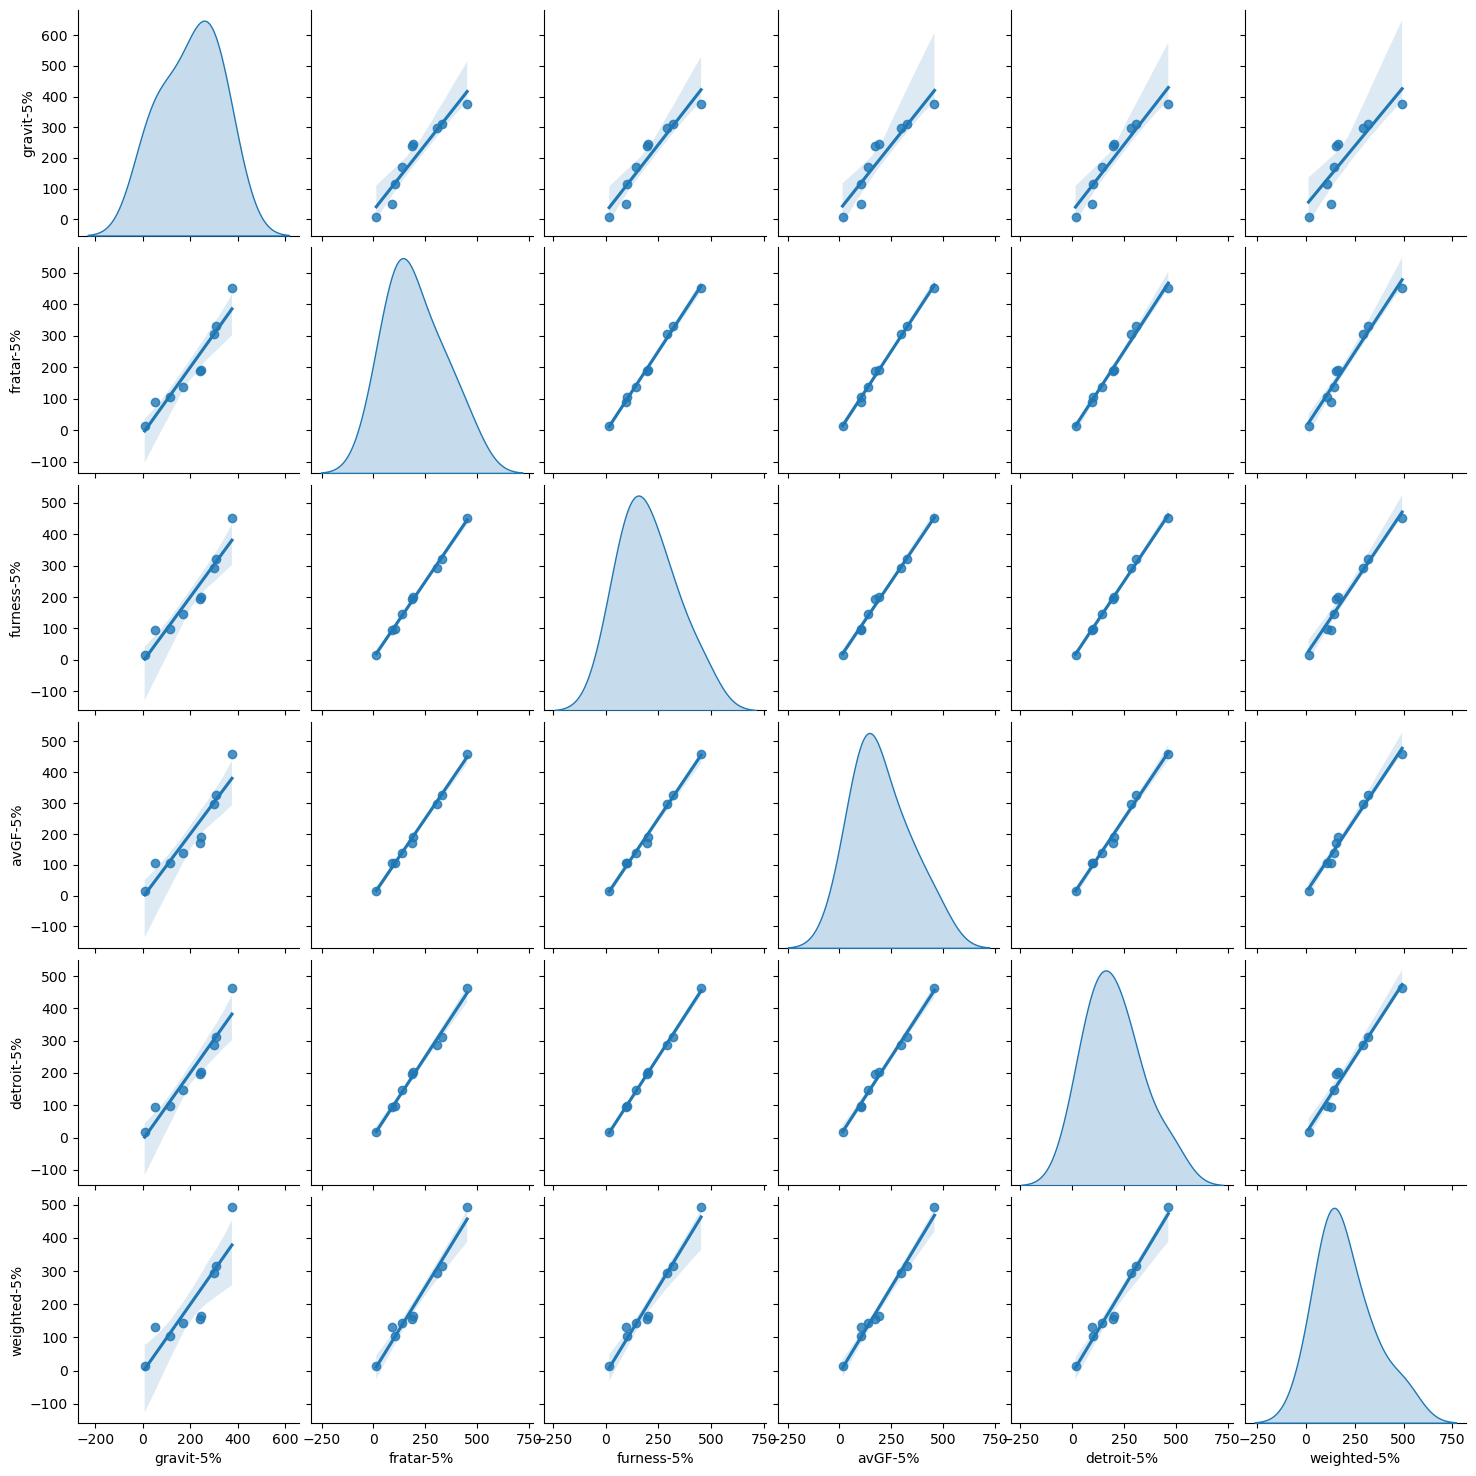

In [89]:
# plot of kernel density estimate (KDE) and regression between methods
sns.pairplot(all_travs5, kind='reg', diag_kind='kde')

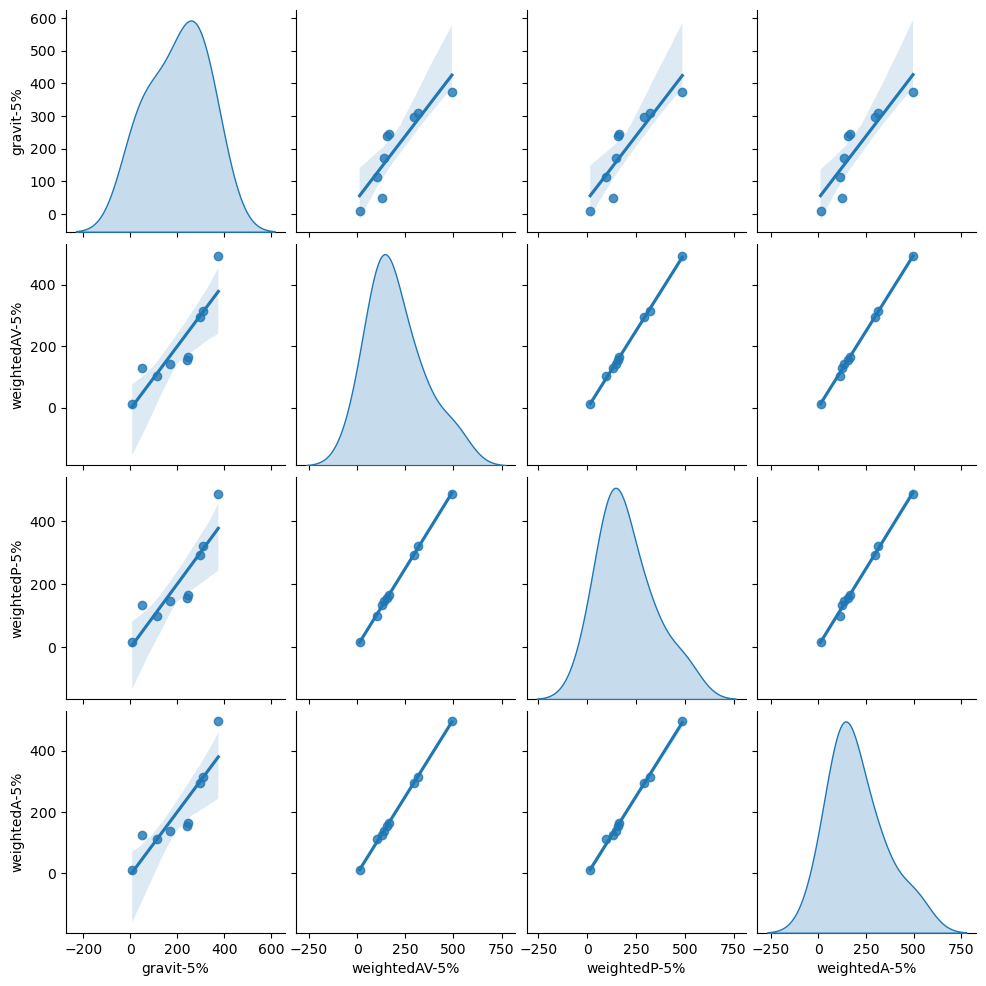

In [90]:
# plot of kernel density estimate (KDE) and regression between methods
sns.pairplot(wg_travs5, kind='reg', diag_kind='kde')

#### Determine paired t-tests for the data sets
##### The data set generated with weighted method will be paired with each other data set, 
##### in order (i.e., gravitational, Fratar, Furness,average GF, and Detroit

In [91]:
# Comparing gravitational model with weighted data set

t_statistic, p_value = stats.ttest_rel(gvalsr_finflat5, travsc_wgtdflat5)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.00000
P-value: 1.00000
The difference between the models is not statistically significant.


In [92]:
# Comparing Fratar with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_fratflat5, travsc_wgtdflat5)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: -0.01266
P-value: 0.99021
The difference between the models is not statistically significant.


In [93]:
# Comparing Furness with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_furnflat5, travsc_wgtdflat5)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.01239
P-value: 0.99042
The difference between the models is not statistically significant.


In [94]:
# Comparing average GF with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_avgfflat4, travsc_wgtdflat4)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.01758
P-value: 0.98640
The difference between the models is not statistically significant.


In [95]:
# Comparing Detroit with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_detrflat5, travsc_wgtdflat5)

print(f"T-statistic: {t_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.05057
P-value: 0.96091
The difference between the models is not statistically significant.
